# The *Sweeper Module*


In [1]:
import zhinst.toolkit as tk

mfli = tk.MFLI("mf1", "dev3337", interface="pcie", host="10.42.3.78")
mfli.setup()           # set up data server connection
mfli.connect_device()  # connect device to data server

Successfully connected to data server at 10.42.3.788004 api version: 6
Successfully connected to device DEV3337 on interface PCIE


The Sweeper Module allows the user to perform sweeps as in the Sweeper Tab of the LabOne User Interface. In general, the Sweeper can be used to obtain data when measuring a DUT's response to varying (or sweeping) one instrument setting while other instrument settings are kept constant. For more information on the *Sweeper Module*  see the [LabOne Programming Manual](https://www.zhinst.com/sites/default/files/documents/2020-03/LabOneProgrammingManual_20.01.0.pdf).

All the module parameters are added as attributes of the *Sweeper Module*.

In [2]:
mfli.sweeper


signals:
parameters:
 - averaging_sample
 - averaging_tc
 - averaging_time
 - awgcontrol
 - bandwidth
 - bandwidthcontrol
 - bandwidthoverlap
 - clearhistory
 - device
 - endless
 - gridnode
 - historylength
 - loopcount
 - maxbandwidth
 - omegasuppression
 - order
 - phaseunwrap
 - remainingtime
 - samplecount
 - save_csvlocale
 - save_csvseparator
 - save_directory
 - save_fileformat
 - save_filename
 - save_save
 - save_saveonread
 - scan
 - settling_inaccuracy
 - settling_tc
 - settling_time
 - sincfilter
 - start
 - stop
 - xmapping

As for the *Data Acquisition Module* the available signal sources can be shown with `signals_list(...)`. They can differ depending on the options installed in the instrument.

The device parameters that are available for sweeping can be listed with `sweep_parameter_list()`:

In [3]:
mfli.sweeper.sweep_parameter_list()

['auxout0offset',
 'auxout1offset',
 'auxout2offset',
 'auxout3offset',
 'demdod0phase',
 'demdod1phase',
 'frequency',
 'output0amp',
 'output0offset']

A typical frequency sweep from 1-10 kHz and 100 steps is configured as follows. We add the signal from the first demodulator (*'demod0'*) to the measurement. 

In [4]:
# prepare a frequency sweep
mfli.sweeper.start(1e3)
mfli.sweeper.stop(10e3)
mfli.sweeper.samplecount(100)
mfli.sweeper.sweep_parameter("frequency")

# add a singal source
demod = mfli.sweeper.signals_add("demod0")

set sweep parameter to 'frequency': 'oscs/0/freq'


In [5]:
mfli.sweeper.signals

['/dev3337/demods/0/sample']

The measurement is simply started with the `measure()` method:

In [6]:
# perform measurement
mfli.sweeper.measure()

subscribed to: /dev3337/demods/0/sample
Sweeping oscs/0/freq from 1000.0 to 10000.0
Progress: 0.0%
Progress: 6.0%
Progress: 13.0%
Progress: 18.0%
Progress: 24.0%
Progress: 32.0%
Progress: 39.0%
Progress: 46.0%
Progress: 54.0%
Progress: 62.0%
Progress: 69.0%
Progress: 74.0%
Progress: 74.0%
Progress: 74.0%
Progress: 82.0%
Progress: 90.0%
Progress: 98.0%
Finished


The results are stored in the `results` dictionary with the exact node path as the key. The value is a `DAQResults` object from the `zhinst-toolkit`. It contains all the data of the demodulator that has been returned by the Python API. 

In [7]:
result = mfli.sweeper.results[demod]

In [8]:
result


attributes:
 - header
 - timestamp
 - samplecount
 - flags
 - sampleformat
 - sweepmode
 - bandwidthmode
 - auxin0
 - auxin0pwr
 - auxin0stddev
 - auxin1
 - auxin1pwr
 - auxin1stddev
 - bandwidth
 - frequency
 - frequencypwr
 - frequencystddev
 - grid
 - phase
 - phasepwr
 - phasestddev
 - r
 - rpwr
 - rstddev
 - settling
 - tc
 - tcmeas
 - x
 - xpwr
 - xstddev
 - y
 - ypwr
 - ystddev
 - count
 - nexttimestamp
 - settimestamp

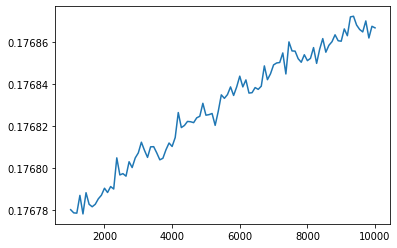

In [9]:
import matplotlib.pyplot as plt

plt.plot(result.frequency, result.x)
plt.show()